In [1]:
from utils import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 40)

In [12]:
df = pd.read_parquet(dataset_path + 'BA_complete.parquet')
df.sample(3)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_std,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,serving_type_rulebased,polarity,subjectivity,readability_score,user_filtered_nbr_reviews,beer_id_filtered_nbr_reviews,beer_id_filtered_avg,beer_id_filtered_std,beer_id_filtered_avg_appearance,beer_id_filtered_avg_aroma,beer_id_filtered_avg_palate,beer_id_filtered_avg_taste,beer_id_filtered_avg_overall,beer_id_filtered_std_appearance,beer_id_filtered_std_aroma,beer_id_filtered_std_palate,beer_id_filtered_std_taste,beer_id_filtered_std_overall,user_country,user_subregion,user_US_state,beer_group
1050698,2559,388,Lambic - Unblended,1206356400,sacodetoro.19384,4.0,4.50,4.50,4.5,4.0,4.37,On tap at Falling Rock.Poured a bril...,857,320,3.90,5.0,232,232,1.116238e+09,"United States, California",Belgium,82,3.742138,4.021226,3.632862,3.918239,3.867925,0.657588,0.510475,0.497769,0.721622,0.566547,0.657588,draft,0.274250,0.599917,77.94,138,191,3.928586,0.431413,3.746073,4.037958,3.650524,3.965969,3.914921,0.489008,0.497559,0.710300,0.509922,0.589067,United States of America,Northern America,California,Sour Beers
302573,93324,396,Belgian Strong Dark Ale,1368093600,hophead84.109437,3.5,4.25,4.25,4.0,4.0,4.06,04/26/2013On tap at Alesmith.A: Dark...,65,11,3.87,10.0,2942,2241,1.164798e+09,"United States, California","United States, California",288,3.722222,3.944444,3.888889,3.833333,3.833333,0.279508,0.618017,0.390868,0.377308,0.306186,0.279508,draft,0.253284,0.553333,78.25,1570,7,3.811429,0.299412,3.535714,3.928571,3.821429,3.785714,3.785714,0.528925,0.426084,0.345033,0.303746,0.267261,United States of America,Northern America,California,Strong Ales
168349,658,184,Tripel,1312624800,spcoly.375520,4.0,3.50,3.50,3.5,3.5,3.53,recommended by store manager as one ...,981,471,3.91,8.0,36,33,1.254218e+09,"United States, Illinois",Netherlands,20,3.883833,3.847966,3.851713,3.906852,3.870450,0.541788,0.493271,0.479361,0.533067,0.513128,0.541788,bottle,0.047899,0.580602,45.93,17,193,3.853938,0.433776,3.840674,3.836788,3.792746,3.892487,3.830311,0.489011,0.488054,0.577733,0.515800,0.537065,United States of America,Northern America,Illinois,Historical and Traditional Beers


In [21]:
# add column with review date
df['review_date'] = pd.to_datetime(df['date'], unit='s')

# extract year and month from review date
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.month

# drop column review date
df.drop(columns=['review_date'], inplace=True)

df[['date', 'review_year', 'review_month']].sample(3)

,date,review_year,review_month
968383,1441706400,2015,9
602946,1317636000,2011,10
559937,1258196400,2009,11


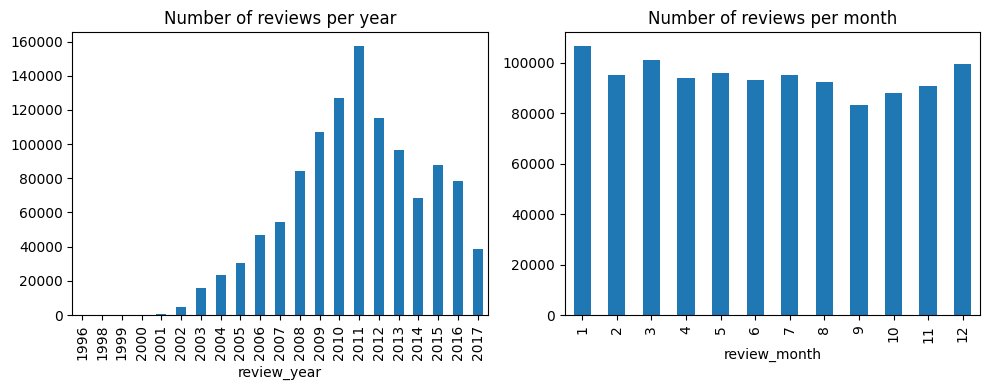

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# show the number of reviews per year
df.review_year.value_counts().sort_index().plot(kind='bar', title='Number of reviews per year', ax=axes[0])

# show the number of reviews per month
df.review_month.value_counts().sort_index().plot(kind='bar', title='Number of reviews per month', ax=axes[1])

plt.tight_layout()
plt.show()

In [32]:
# add column with user_joined date
df['user_joined__date'] = pd.to_datetime(df['user_joined'], unit='s')

# extract year and month from user_joined date
df['user_joined_year'] = df['user_joined__date'].dt.year
df['user_joined_month'] = df['user_joined__date'].dt.month

# drop column user_joined date
df.drop(columns=['user_joined__date'], inplace=True)

df[['date', 'user_joined_year', 'user_joined_month']].sample(3)

,date,user_joined_year,user_joined_month
356744,1331636400,2007,10
510339,1367143200,2009,3
403159,1418986800,2010,7


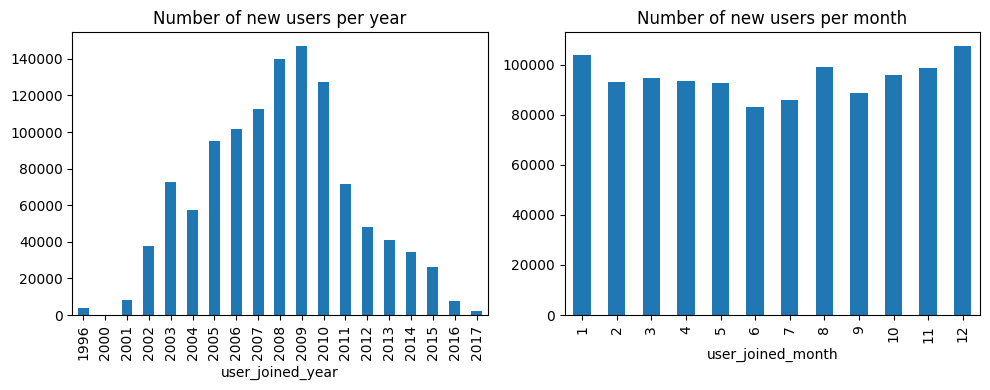

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# show the number of new users per year
df.user_joined_year.value_counts().sort_index().plot(kind='bar', title='Number of new users per year', ax=axes[0])

# show the number of new users per month
df.user_joined_month.value_counts().sort_index().plot(kind='bar', title='Number of new users per month', ax=axes[1])

plt.tight_layout()
plt.show()